# Практика

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [33]:
# 0 принимаем за герб
N = 100000
rdf = pd.DataFrame({"m1": np.random.randint(2, size=N), "m2": np.random.randint(2, size=N)})
print(rdf)
# монеты выпали разными сторонами: 
filter = ((rdf["m1"] + rdf["m2"]) == 1)
print(rdf[filter].shape[0] / N)

       m1  m2
0       0   0
1       1   1
2       1   0
3       0   0
4       1   1
...    ..  ..
99995   0   1
99996   1   1
99997   1   1
99998   1   0
99999   0   1

[100000 rows x 2 columns]
0.50149


### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [21]:
# 0 принимаем за герб
size = 1000000
rdf = pd.DataFrame({"m1": np.random.randint(2, size=size), "m2": np.random.randint(2, size=size), "m3": np.random.randint(2, size=size)})
print(rdf)

# не выпало ни одного герба: 
filter1 = ((rdf["m1"] + rdf["m2"] + rdf["m3"]) == 3)
print(rdf[filter1].shape[0] / size)

# выпало четное число гербов: 
filter2 = ((rdf["m1"] + rdf["m2"] + rdf["m3"]).isin([0,2]))
print(rdf[filter2].shape[0] / size)

# на третьей монете выпал герб: 
filter3 = ((rdf["m3"] == 0))
print(rdf[filter3].shape[0] / size)

        m1  m2  m3
0        1   0   0
1        0   1   1
2        1   0   0
3        0   0   0
4        1   1   0
...     ..  ..  ..
999995   1   0   0
999996   0   1   1
999997   0   0   1
999998   0   1   1
999999   1   1   1

[1000000 rows x 3 columns]
0.124627
0.500171
0.499862


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [60]:
def getrnd():
    arr = ["E", "L", "N"]
    rnds = pd.Series(np.random.choice(arr, size=3))
    ser = rnds.value_counts()
    i = ser.idxmax()
    v = ser[i]
    return rnds, (i if v >= 2 else "N")

count = 100000
res = pd.Series(index=range(count), dtype=str)
res = res.apply(lambda x: getrnd())
print(res)
res = res.apply(lambda x: x[1])
cs = res.value_counts()

e, l, n = cs.loc["E"], cs.loc["L"], cs.loc["N"]
print("Рекомендован кандидат E: {}, {:.2%}".format(e, e/count))
print("Рекомендован кандидат L: {}, {:.2%}".format(l, l/count))
print("Никто не рекомендован: {}, {:.2%}".format(n, n/count))

0        ([N, E, N], N)
1        ([L, L, L], L)
2        ([N, N, L], N)
3        ([L, L, L], L)
4        ([E, L, N], N)
              ...      
99995    ([L, L, L], L)
99996    ([L, N, L], L)
99997    ([N, N, E], N)
99998    ([N, N, N], N)
99999    ([N, N, L], N)
Length: 100000, dtype: object
Рекомендован кандидат E: 25969, 25.97%
Рекомендован кандидат L: 25867, 25.87%
Никто не рекомендован: 48164, 48.16%


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [59]:
N = 1000000
arr = [1, 2, 3, 4, 5, 6]
rdf = pd.DataFrame({"m1": np.random.choice(arr, size=N), "m2": np.random.choice(arr, size=N)})
print(rdf)

# выпало две "шестерки": 
filter1 = ((rdf["m1"] + rdf["m2"]) == 12)
print("{:.2%}".format(rdf[filter1].shape[0] / N))

# сумма выпавших очков не меньше 11: 
filter2 = ((rdf["m1"] + rdf["m2"]) >= 11)
print("{:.2%}".format(rdf[filter2].shape[0] / N))

# не выпала ни одна "шестерка": 
filter3 = ((rdf["m1"] < 6) & (rdf["m2"] < 6))
print("{:.2%}".format(rdf[filter3].shape[0] / N))

        m1  m2
0        3   4
1        4   6
2        2   6
3        4   1
4        1   6
...     ..  ..
999995   3   6
999996   4   6
999997   5   2
999998   3   1
999999   3   1

[1000000 rows x 2 columns]
2.79%
8.35%
69.41%


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [62]:
# выпала хотя бы одна "шестерка": 
filter4 = ((rdf["m1"] == 6) | (rdf["m2"] == 6))
print("{:.2%}".format(rdf[filter4].shape[0] / N))

30.59%


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [107]:
N = 1000000
arr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rdf = pd.DataFrame({"num1": np.random.choice(arr, size=N), "num2": np.random.choice(arr, size=N), "num3": np.random.choice(arr, size=N)})
print(rdf)
filterA = ((rdf["num1"] != rdf["num2"]) & (rdf["num2"] != rdf["num3"]) & (rdf["num1"] != rdf["num3"]))
P_A = rdf[filterA].shape[0] / N
print("Вероятность, что стерлись различные цифры: {:.2%}".format(P_A))

filterB = ((rdf["num1"] == rdf["num2"]) & (rdf["num2"] == rdf["num3"]))
P_B = rdf[filterB].shape[0] / N
print("Вероятность, что стерлись одинаковые цифры: {:.2%}".format(P_B))

print("Вероятность, что среди стершихся цифр хотя бы две совпадают: {:.2%}".format(1-P_A))
print("Вероятность, что среди стершихся цифр хотя бы две различны: {:.2%}".format(1-P_B))

        num1  num2  num3
0          9     9     7
1          9     5     7
2          8     9     6
3          4     9     7
4          4     6     5
...      ...   ...   ...
999995     2     7     8
999996     2     9     5
999997     2     2     9
999998     6     2     6
999999     6     0     9

[1000000 rows x 3 columns]
Вероятность, что стерлись различные цифры: 71.99%
Вероятность, что стерлись одинаковые цифры: 1.01%
Вероятность, что среди стершихся цифр хотя бы две совпадают: 28.01%
Вероятность, что среди стершихся цифр хотя бы две различны: 98.99%


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

Вероятность выигрыша: 9.89%


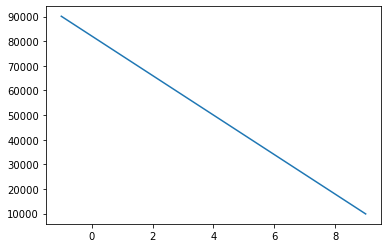

In [93]:
N = 100000
arr = [-1, -1, -1, -1, -1, -1, -1, -1, -1, 9]
rdf = pd.DataFrame({"win": np.random.choice(arr, size=N)})
filter = ((rdf["win"]) == 9)
print("Вероятность выигрыша: {:.2%}".format(rdf[filter].shape[0] / N))
plt.plot(rdf["win"].value_counts().sort_index())

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

        m1  m2  m3
0        4   4   8
1        1   5   6
2        5   4   9
3        6   4  10
4        5   3   8
...     ..  ..  ..
999995   2   1   3
999996   1   5   6
999997   5   4   9
999998   5   4   9
999999   3   5   8

[1000000 rows x 3 columns]
16.72%
83.28%


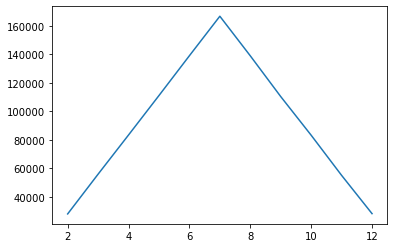

In [89]:
N = 1000000
arr = [1, 2, 3, 4, 5, 6]
rdf = pd.DataFrame({"m1": np.random.choice(arr, size=N), "m2": np.random.choice(arr, size=N)})
rdf["m3"] = rdf["m1"] + rdf["m2"]
print(rdf)
# сумма выпавших очков <= 4: 
filter = ((rdf["m3"]) <= 4)
print("{:.2%}".format(rdf[filter].shape[0] / N))

# сумма выпавших очков > 4:
filter = ((rdf["m3"]) > 4)
print("{:.2%}".format(rdf[filter].shape[0] / N))

plt.plot(rdf["m3"].value_counts().sort_index())

## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


In [27]:
N = 100000
nominals = ['6', '7', '8', '9', '10', 'валет', 'дама', 'король', 'туз']
colour = ['пики', 'трефы', 'бубны', 'черви']
from itertools import product
df = ["{} {}".format(*card) for card in product(nominals, colour)]
rdf = pd.DataFrame({"card": np.random.choice(df, size=N)})
print(rdf)

filter1 = rdf["card"].str.startswith('6')
p1 = rdf[filter1].shape[0] / N  #вероятность того, что первой была шестерка
filter2 = rdf["card"].str.startswith('7')
p2 = rdf[filter2].shape[0] / (N-1) #вероятность того, что второй была семерка
print("Вероятность того, что первой картой была шестерка, а второй семерка: {:.2%}".format(p1*p2))

filter1 = (rdf["card"] == '6 бубны')
p1 = rdf[filter1].shape[0] / N   #вероятность того, что первой была бубновая шестерка
filter2 = (rdf["card"] == '7 бубны')
p2 = rdf[filter2].shape[0] / (N-1) #вероятность того, что второй была бубновая семерка
print("Вероятность того, что обе карты бубновой масти: {:.2%}".format(p1*p2))

            card
0         6 пики
1      туз черви
2         7 пики
3        8 трефы
4        8 черви
...          ...
99995    7 трефы
99996    8 трефы
99997    7 бубны
99998    6 черви
99999    9 трефы

[100000 rows x 1 columns]
Вероятность того, что первой картой была шестерка, а второй семерка: 1.23%
Вероятность того, что обе карты бубновой масти: 0.08%


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [88]:
N = 1000000
rdf = pd.DataFrame({"balls": np.random.choice(['W', 'W', 'B', 'B', 'B'], size=N)})

filter1 = (rdf["balls"] == 'W')
p1 = (rdf1[filter1].shape[0] / N) # вероятность того, что первый шар белый или второй черный

new_rdf = pd.DataFrame({"balls": np.random.choice(['W', 'B', 'B', 'B'], size=N)})
filter2 = (new_rdf["balls"] == 'W')
p2 = (new_rdf[filter2].shape[0] / N) # вероятность того, что второй шар белый

print("Вероятность того, что извлечены два белых шара: {:.2%}".format(p1*p2))
print("Вероятность того, что извлечены два черных шара: {:.2%}".format(p1*(1-p1)))


Вероятность того, что извлечены два белых шара: 9.99%
Вероятность того, что извлечены два черных шара: 24.00%
